In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_data_gen = ImageDataGenerator(rescale=1.0/255) # Normalization
valid_data_gen = ImageDataGenerator(rescale=1.0/255) # Normalization

In [11]:
'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0


# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_man_pix = [os.path.join(train_man_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_woman_pix = [os.path.join(train_woman_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_man_pix+next_woman_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    import matplotlib.image as mpimg
    nrows = 4
    ncols = 4
    pic_index = 0
'''

"\n%matplotlib inline\nimport matplotlib.pyplot as plt\n# Set up matplotlib fig, and size it to fit 4x4 pics\nfig = plt.gcf()\nfig.set_size_inches(ncols * 4, nrows * 4)\n\npic_index += 8\nnext_man_pix = [os.path.join(train_man_dir, fname) \n                for fname in train_cat_fnames[pic_index-8:pic_index]]\nnext_woman_pix = [os.path.join(train_woman_dir, fname) \n                for fname in train_dog_fnames[pic_index-8:pic_index]]\n\nfor i, img_path in enumerate(next_man_pix+next_woman_pix):\n  # Set up subplot; subplot indices start at 1\n    sp = plt.subplot(nrows, ncols, i + 1)\n    sp.axis('Off') # Don't show axes (or gridlines)\n    img = mpimg.imread(img_path)\n    plt.imshow(img)\n    plt.show()\n    import matplotlib.image as mpimg\n    nrows = 4\n    ncols = 4\n    pic_index = 0\n"

NameError: name 'train_X' is not defined

In [26]:
train_data = train_data_gen.flow_from_directory(
                                            './data/gender_detection_face/train',
                                            target_size=(150,150),
                                            batch_size= 20,
                                            class_mode= 'binary')

valid_data = valid_data_gen.flow_from_directory(
                                            './data/gender_detection_face/valid',
                                            target_size=(150, 150),
                                            batch_size=20,
                                            class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [27]:
train_data.class_indices
valid_data.class_indices

{'man': 0, 'woman': 1}

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam, SGD,RMSprop

In [29]:
model = Sequential()
model.add(Flatten())
model.add(Dense(800, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(
            loss = 'binary_crossentropy',
            optimizer= RMSprop(learning_rate=0.001),
            metrics = ['acc'])

In [31]:
history = model.fit(train_data,epochs = 10,validation_data = valid_data)

Epoch 1/10
80/80 [==============================] - 79s 982ms/step - loss: 8.4530 - acc: 0.4931 - val_loss: 0.6716 - val_acc: 0.5176
Epoch 2/10
80/80 [==============================] - 62s 771ms/step - loss: 0.8713 - acc: 0.4938 - val_loss: 0.7316 - val_acc: 0.5000
Epoch 3/10
80/80 [==============================] - 66s 819ms/step - loss: 0.7112 - acc: 0.5938 - val_loss: 0.6311 - val_acc: 0.6529
Epoch 4/10
80/80 [==============================] - 67s 839ms/step - loss: 0.5839 - acc: 0.7287 - val_loss: 0.4734 - val_acc: 0.7794
Epoch 5/10
80/80 [==============================] - 68s 848ms/step - loss: 0.5210 - acc: 0.7556 - val_loss: 0.4755 - val_acc: 0.7735
Epoch 6/10
80/80 [==============================] - 71s 884ms/step - loss: 0.5148 - acc: 0.7681 - val_loss: 0.4797 - val_acc: 0.7941
Epoch 7/10
80/80 [==============================] - 70s 871ms/step - loss: 0.4667 - acc: 0.7994 - val_loss: 0.4447 - val_acc: 0.7824
Epoch 8/10
80/80 [==============================] - 70s 881ms/step - 

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  54000800  
_________________________________________________________________
dense_13 (Dense)             multiple                  320400    
_________________________________________________________________
dense_14 (Dense)             multiple                  80200     
_________________________________________________________________
dense_15 (Dense)             multiple                  20100     
_________________________________________________________________
dense_16 (Dense)             multiple                  5050      
_________________________________________________________________
dense_17 (Dense)             multiple                 

In [33]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [34]:
min(history_dict['loss'])

0.3940335214138031

In [35]:
max(history_dict['acc'])

0.8243749737739563

In [41]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [42]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['acc']
loss=history.history['loss']
val_loss=history.history['loss']


In [60]:
epochs=range(len(val_acc)) # Get number of epochs
#epochs = range(1,len(history_dict['acc']) + 1)

<Figure size 432x288 with 0 Axes>

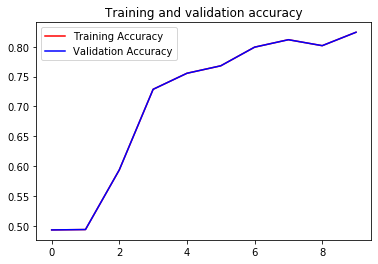

<Figure size 432x288 with 0 Axes>

In [61]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label = "Training Accuracy",)
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 432x288 with 0 Axes>

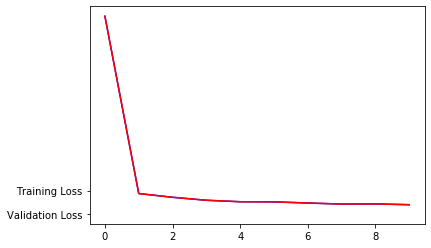

<Figure size 432x288 with 0 Axes>

In [63]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.plot(epochs, loss, 'r', "Training Loss")

plt.figure()


In [70]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
img = load_image('C:/Users/Asif/QUARTER 2/Deep Learning/ CLASS/data/self/02.jpg')

# predict the class
result = model.predict(img)
if(result[0]==0):
    print("MAN")
else:
    print("WOMAN")

MAN
